# Examining The SparkContext  
  
In this exercise you'll get familiar with the SparkContext.

You'll probably notice that code takes longer to run than you might expect. This is because Spark is some serious software. It takes more time to start up than you might be used to. You may also find that running simpler computations might take longer than expected. That's because all the optimizations that Spark has under its hood are designed for complicated operations with big data sets. That means that for simple or small problems Spark may actually perform worse than some other solutions!  
  
## Instructions  
  
Get to know the SparkContext.

+ Call `print()` on sc to verify there's a `SparkContext` in your environment.  
+ `print() sc.version` to see what version of Spark is running on your cluster.  

In [1]:
# Verify SparkContext
print(sc)

# Print Spark version
print(sc.version)

<SparkContext master=local[*] appName=PySparkShell>
2.4.4


# Creating a SparkSession  
  
We've already created a `SparkSession` for you called `spark`, but what if you're not sure there already is one? Creating multiple `SparkSession`s and `SparkContext`s can cause issues, so it's best practice to use the `SparkSession.builder.getOrCreate()` method. This returns an existing `SparkSession` if there's already one in the environment, or creates a new one if necessary!  
  
## Instructions  
  
+ Import `SparkSession` from `pyspark.sql`.    
+ Make a new `SparkSession` called `my_spark` using `SparkSession.builder.getOrCreate()`.  
+ Print `my_spark` to the console to verify it's a `SparkSession`.  

In [2]:
# Import SparkSession from pyspark.sql
from pyspark.sql import SparkSession

# Create my_spark
my_spark = SparkSession.builder.getOrCreate()

# Print my_spark
print(my_spark)

# Viewing tables  
  
Once you've created a `SparkSession`, you can start poking around to see what data is in your cluster!  

Your `SparkSession` has an attribute called `catalog` which lists all the data inside the cluster. This attribute has a few methods for extracting different pieces of information.  

One of the most useful is the `.listTables()` method, which returns the names of all the tables in your cluster as a `list`.  
  
## Instructions:  
  
See what tables are in your cluster by calling `spark.catalog.listTables()` and printing the result!  

In [6]:
# Print the tables in the catalog
print(my_spark.catalog.listTables())

[]


# Are you query-ious?  
  
One of the advantages of the DataFrame interface is that you can run SQL queries on the tables in your Spark cluster. If you don't have any experience with SQL, don't worry, we'll provide you with queries! (To learn more SQL, start with our Introduction to SQL course.)  

As you saw in the last exercise, one of the tables in your cluster is the `flights` table. This table contains a row for every flight that left Portland International Airport (PDX) or Seattle-Tacoma International Airport (SEA) in 2014 and 2015.  

Running a query on this table is as easy as using the `.sql()` method on your `SparkSession`. This method takes a string containing the query and returns a DataFrame with the results!  

If you look closely, you'll notice that the table `flights` is only mentioned in the query, not as an argument to any of the methods. This is because there isn't a local object in your environment that holds that data, so it wouldn't make sense to pass the table as an argument.  

Remember, we've already created a `SparkSession` called `spark` in your workspace. (It's no longer called `my_spark` because we created it for you!)  
  
## Instructions:  
  
+ Use the `.sql()` method to get the first 10 rows of the `flights` table and save the result to `flights10`. The variable query contains the appropriate SQL query.  
+ Use the DataFrame method `.show()` to print `flights10`.  

In [8]:
# Don't change this query
query = "FROM flights SELECT * LIMIT 10"

# Get the first 10 rows of flights
flights10 = spark.sql(query)

# Show the results
flights10.show()

# Pandafy a Spark DataFrame  
  
Suppose you've run a query on your huge dataset and aggregated it down to something a little more manageable.  

Sometimes it makes sense to then take that table and work with it locally using a tool like `pandas`. Spark DataFrames make that easy with the `.toPandas()` method. Calling this method on a Spark DataFrame returns the corresponding `pandas` DataFrame. It's as simple as that!  

This time the query counts the number of flights to each airport from SEA and PDX.  

Remember, there's already a `SparkSession` called `spark` in your workspace!  
  
## Instructions:  
  
+ Run the query using the `.sql()` method. Save the result in `flight_counts`.  
+ Use the `.toPandas()` method on `flight_counts` to create a `pandas` DataFrame called `pd_counts`.  
+ Print the `.head()` of `pd_counts` to the console.    

In [ ]:
# Don't change this query
query = "SELECT origin, dest, COUNT(*) as N FROM flights GROUP BY origin, dest"

# Run the query
flight_counts = spark.sql(query)

# Convert the results to a pandas DataFrame
pd_counts =  flight_counts.toPandas()

# Print the head of pd_counts
print(pd_counts.head())

# Put some Spark in your data  
  
In the last exercise, you saw how to move data from Spark to pandas. However, maybe you want to go the other direction, and put a pandas DataFrame into a Spark cluster! The `SparkSession` class has a method for this as well.  

The `.createDataFrame()` method takes a `pandas` DataFrame and returns a `Spark` DataFrame.  

The output of this method is stored locally, not in the `SparkSession catalog`. This means that you can use all the Spark DataFrame methods on it, but you can't access the data in other contexts.

For example, a SQL query (using the `.sql()` method) that references your DataFrame will throw an error. To access the data in this way, you have to save it as a temporary table.

You can do this using the `.createTempView()` Spark DataFrame method, which takes as its only argument the name of the temporary table you'd like to register. This method registers the DataFrame as a table in the `catalog`, but as this table is temporary, it can only be accessed from the specific `SparkSession` used to create the `Spark` DataFrame.

There is also the method `.createOrReplaceTempView()`. This safely creates a new temporary table if nothing was there before, or updates an existing table if one was already defined. You'll use this method to avoid running into problems with duplicate tables.

Check out the diagram to see all the different ways your Spark data structures interact with each other.  
  
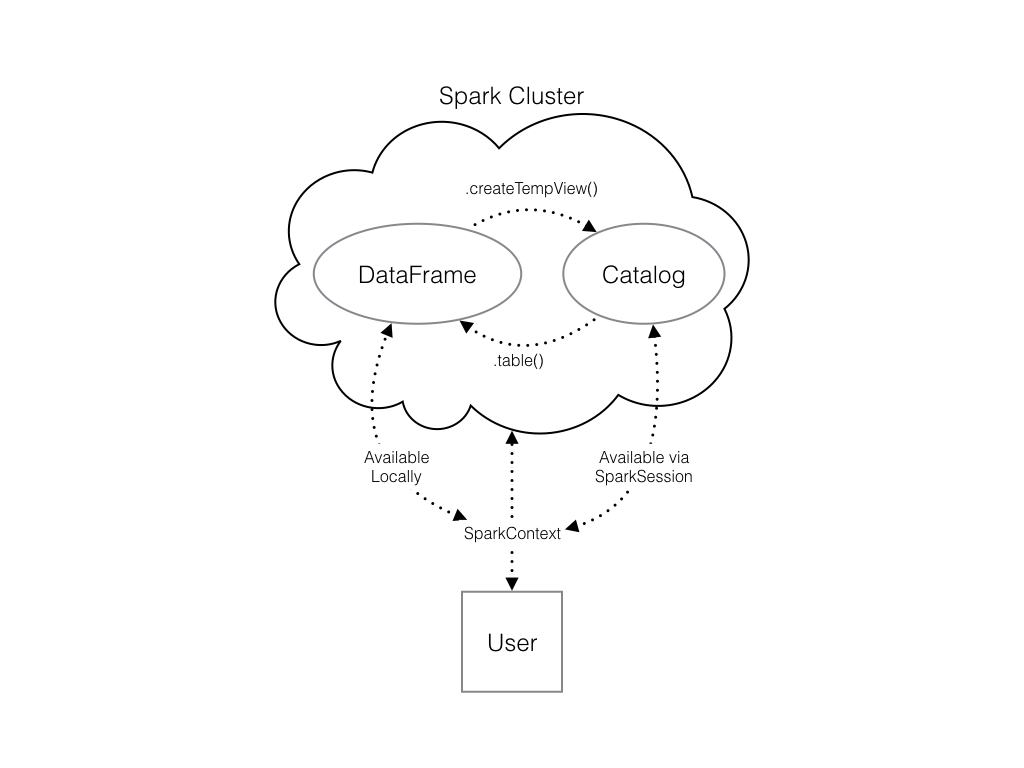  
  
There's already a `SparkSession` called `spark` in your workspace, `numpy` has been imported as `np`, and `pandas` as `pd`.  
  
## Instructions:  
  
+ The code to create a `pandas` DataFrame of random numbers has already been provided and saved under `pd_temp`.  
+ Create a Spark DataFrame called `spark_temp` by calling the `.createDataFrame()` method with `pd_temp` as the argument.  
+ Examine the list of tables in your `Spark` cluster and verify that the new DataFrame is not present. Remember you can use `spark.catalog.listTables()` to do so.  
+ Register `spark_temp` as a temporary table named `"temp"` using the `.createOrReplaceTempView()` method. Remember that the table name is set including it as the only argument!  
+ Examine the list of tables again!  

In [ ]:
# Create pd_temp
pd_temp = pd.DataFrame(np.random.random(10))

# Create spark_temp from pd_temp
spark_temp = spark.createDataFrame(pd_temp)

# Examine the tables in the catalog
print(spark.catalog.listTables())

# Add spark_temp to the catalog
spark_temp.createOrReplaceTempView("temp")

# Examine the tables in the catalog again
print(spark.catalog.listTables())